Nama: Ahmad Nasrudin Jamil

NIM : 210411100098

Kelas : Pencarian dan Penambangan Web B

# Klasifikasi Berita dengan Reduksi Dimensi

# Implementasi

## Library

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

## Dataset

In [24]:
# Load the CSV files
Xtrain = pd.read_csv('Xtrain.csv')
Xtest = pd.read_csv('Xtest.csv')
Ytrain = pd.read_csv('Ytrain.csv')
Ytest = pd.read_csv('Ytest.csv')

print("Data has been loaded successfully.")

Data has been loaded successfully.


In [25]:
print(Xtrain)

                                                    0
0   endometriosis kondisi jaring endometrium sejat...
1   daun pandan bahan alami jadi obat tradisional ...
2   menteri budaya fadli zon tim kaji gabung undan...
3   sakit wasir timbul kalang orang dewasa usia sa...
4   universitas indonesia ui sorot kondisi kembang...
..                                                ...
75  stigma putar sehat jiwa sulit hilang stigma de...
76  buah terong kaya antioksidan serat potasium vi...
77  federasi serikat guru indonesia fsgi tolak uji...
78  tumor tumbuh sel normal tumor tumbuh tubuh kel...
79  batas asupan gula din hamil usia anak anak dam...

[80 rows x 1 columns]


In [26]:
print(Ytrain)

    0
0   1
1   1
2   0
3   1
4   0
.. ..
75  1
76  1
77  0
78  1
79  1

[80 rows x 1 columns]


## TF IDF

### Data Train

In [27]:
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(Xtrain.iloc[:, 0])

terms = vect.get_feature_names_out()
tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=terms)
tfidf

,aba,abad,abadi,abai,abdi,abdul,abroad,ac,academy,acak,...,yoga,yogyakarta,your,youtube,yusif,zaman,zat,zinc,zon,zonasi
0,0.0,0.0,0.0,0.031945,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.054389,0.0,0.0,0.000000,0.0,0.231852,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.04322,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
76,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.033109,0.0,0.000000,0.0
77,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
78,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [28]:
# Menyimpan vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)

In [29]:
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

### Data Test

In [30]:
tfidf_matrix_baru = vect.transform(Xtest.iloc[:, 0]) 
terms_baru = vect.get_feature_names_out()

tfidf_baru = pd.DataFrame(data=tfidf_matrix_baru.toarray(), columns=terms_baru)
tfidf_baru

,aba,abad,abadi,abai,abdi,abdul,abroad,ac,academy,acak,...,yoga,yogyakarta,your,youtube,yusif,zaman,zat,zinc,zon,zonasi
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051977,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.050503,0.101006,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## Reduksi Dimensi

In [31]:
svd = TruncatedSVD(n_components=2800)

# Terapkan SVD pada data pelatihan (matriks TF-IDF)
Xtrain_svd = svd.fit_transform(tfidf_matrix) 

with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd, f)

# Terapkan SVD pada data pengujian (matriks TF-IDF) menggunakan transformasi
Xtest_svd = svd.transform(tfidf_matrix_baru) 

svd_df_train = pd.DataFrame(Xtrain_svd)
svd_df_test = pd.DataFrame(Xtest_svd)

In [32]:
print("\nSVD Matrix untuk data pelatihan:\n")
svd_df_train.head()


SVD Matrix untuk data pelatihan:



,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.123029,0.126570,0.004209,-0.006205,0.327791,-0.157926,-0.242709,-0.428701,0.202488,-0.115219,...,-0.024143,0.243136,-0.226710,0.002640,0.000688,-0.000520,-0.003924,0.001645,0.000989,-0.000004
1,0.178708,0.318191,-0.014089,0.000322,-0.046482,0.024325,0.019958,0.120549,0.045500,0.030760,...,0.000425,0.003997,-0.002632,-0.000396,0.002063,-0.014216,0.001077,0.000290,0.000168,-0.000671
2,0.133580,-0.056250,-0.005129,-0.031346,0.063501,-0.100013,0.166067,0.001143,-0.016998,0.066903,...,0.007342,-0.001339,-0.000918,-0.008901,0.002850,-0.001573,0.000109,0.001198,-0.002306,0.000533
3,0.105401,0.087241,0.004642,-0.011491,0.112592,0.026707,-0.010447,-0.089611,0.045644,-0.014527,...,-0.002143,-0.007811,0.011971,-0.000129,-0.002608,0.001342,-0.000858,0.000713,-0.000458,-0.000352
4,0.168223,-0.056893,-0.027444,-0.021747,0.050904,0.045672,0.060842,-0.036859,0.037186,0.191390,...,-0.007075,-0.003655,-0.006564,0.003898,-0.002779,0.001410,-0.001539,-0.001558,0.001126,-0.000156


In [33]:
print("\nSVD Matrix untuk data pengujian:\n")
svd_df_test.head()


SVD Matrix untuk data pengujian:



,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.321797,-0.162667,0.062506,-0.145981,-0.008093,0.052195,-0.008750,0.038956,-0.047926,-0.107380,...,0.023935,-0.028265,-0.023777,-0.141395,-0.035526,-0.003717,-0.022466,0.002600,0.027871,-0.030133
1,0.078040,0.021311,0.009053,-0.005162,0.073049,-0.019062,-0.000567,-0.018766,-0.038199,0.006997,...,-0.008059,-0.006442,-0.003497,-0.001070,0.018288,-0.024032,0.046450,-0.000036,0.035868,-0.000789
2,0.193657,-0.086286,-0.038276,-0.002539,0.040724,-0.010099,0.026769,0.001319,-0.028787,-0.050841,...,0.024774,0.032022,0.002336,-0.020213,-0.014332,0.012933,0.012897,-0.013135,0.035620,0.019033
3,0.361942,0.648897,-0.029791,-0.003796,-0.253745,0.026968,0.051028,-0.093496,-0.063577,0.000144,...,-0.012145,-0.036261,0.056112,-0.000809,0.003230,-0.042927,-0.011682,0.009145,0.014413,-0.007152
4,0.243742,-0.001067,0.049893,-0.044486,0.226223,-0.077279,-0.041541,0.031838,-0.104401,-0.030707,...,-0.005693,-0.002730,0.018102,0.007956,-0.036767,-0.075601,-0.005783,-0.007609,0.046334,0.006665


## Melatih Model Logistic Regression

In [34]:
# Membuat model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data pelatihan
model.fit(Xtrain_svd, Ytrain.iloc[:, 0])

LogisticRegression()

In [35]:
# Meyimpan model
with open('logistic_model_reduksi', 'wb') as f:
    pickle.dump(model, f)

## Testing Data Baru

In [36]:
with open("logistic_model_reduksi", "rb") as f:
    model = pickle.load(f)

In [37]:
Ypred = model.predict(Xtest_svd)

## Evaluasi

### Akurasi

In [38]:
accuracy = accuracy_score(Ytest.iloc[:, 0], Ypred)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 90.00%


### Confusion Matrix

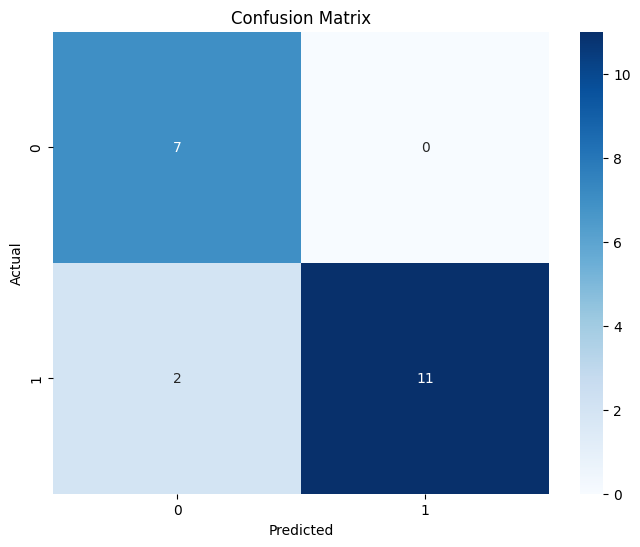

In [39]:
cm = confusion_matrix(Ytest.iloc[:, 0], Ypred)

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(Ytest.iloc[:, 0]), 
            yticklabels=np.unique(Ytest.iloc[:, 0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Deployment

Deployment aplikasi menggunakan bantuan gradio

Link : https://nasrudnj11-klasifikasi-berita-logistic-regrasion-e7a149a.hf.space